In [11]:
# Author: Shang Zhou, final model and model blending were implemented independently.
# Reference : 
# https://www.kaggle.com/code/psycon/audio-data-eda-processing-modeling-recommend
# https://www.kaggle.com/code/soumyasharma20/music-genre-classification-using-cnn

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00005.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00057.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00020.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00072.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00040.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00043.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00010.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00071.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/image

In [12]:
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
df = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv")
df = df.drop(labels = "filename",axis = 1)
class_list = df.iloc[:,-1]
converter = LabelEncoder()
y = converter.fit_transform(class_list)
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:,:-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    return model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = batch_size)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2048, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])
print(model.summary())
history = trainModel(model = model, epochs = 1000, optimizer = 'adam')
def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {predicted_index}")
print(len(X_test))
for i in range(len(X_test)):
    predict(model, X_test[i], y_test[i])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 2048)              120832    
_________________________________________________________________
dropout_54 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_55 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_56 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 256)              

In [28]:
type(model_history)

keras.callbacks.History

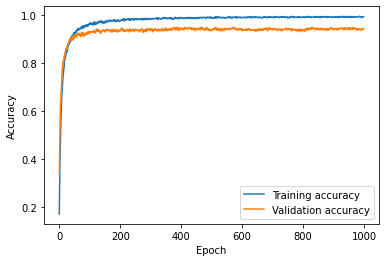

In [45]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# Generate a plot of the training and validation accuracy
plt.plot(train_acc, label="Training accuracy")
plt.plot(val_acc, label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


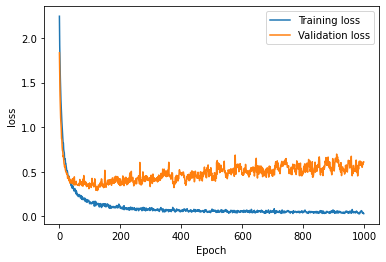

In [46]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Generate a plot of the training and validation accuracy
plt.plot(train_loss, label="Training loss")
plt.plot(val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [15]:
from xgboost import XGBClassifier, XGBRFClassifier
xgb = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

NameError: name 'accuracy_score' is not defined

In [54]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X_train, y_train)
preds = rforest.predict(X_test)
for i in range(len(X_test)):
    print(preds[i])

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
for i in range(len(X_test)):
    print(preds[i])

4
1
5
2
8
3
8
7
8
0
7
1
1
2
0
3
2
7
1
4
6
5
5
4
7
3
2
0
2
8
6
0
7
1
0
3
7
4
0
5
8
3
6
5
7
9
4
1
0
5
6
3
0
8
3
5
4
7
0
9
8
4
4
9
5
4
9
8
1
2
2
0
1
1
1
5
4
6
2
3
1
9
3
9
6
4
4
8
4
3
2
3
9
1
8
3
5
3
8
6
9
3
5
4
1
1
6
5
5
5
3
0
9
6
9
3
2
6
5
5
2
2
2
0
7
2
8
2
0
2
7
6
0
5
1
3
1
7
1
6
2
4
2
5
3
9
7
8
6
7
3
7
8
4
1
3
3
8
8
7
4
0
3
6
8
3
8
5
1
2
8
1
1
0
3
4
1
8
4
2
7
5
8
6
9
1
5
5
2
9
3
9
6
5
0
7
2
5
2
1
0
8
1
2
9
4
5
2
3
2
6
2
3
1
7
4
4
6
1
9
0
2
5
1
2
4
6
6
1
9
8
7
0
6
4
9
7
6
4
4
1
1
2
1
2
8
9
1
2
8
3
6
2
0
9
3
8
0
8
6
9
6
4
7
1
8
8
7
3
6
8
1
3
7
9
2
7
7
8
9
7
8
6
2
4
2
5
1
4
6
8
4
2
7
2
3
3
9
5
7
2
2
6
4
1
6
0
3
1
6
8
9
5
1
6
6
2
4
7
9
6
4
3
0
2
7
1
9
9
8
9
1
1
5
2
3
5
5
9
7
0
3
9
0
2
6
4
1
2
5
2
1
4
7
5
3
1
2
7
5
4
2
4
2
5
7
6
4
7
8
1
5
4
1
3
7
3
7
8
7
9
1
4
6
0
2
0
8
1
5
8
9
9
7
6
6
2
6
9
0
1
6
7
2
8
0
5
8
6
0
4
8
4
1
4
9
9
6
2
9
3
0
7
6
4
9
8
9
3
1
4
6
6
2
4
2
1
7
3
5
8
0
1
0
1
4
3
0
0
0
3
9
4
5
9
1
9
7
8
2
0
0
8
3
2
6
6
1
0
9
1
4
5
3
9
8
9
6
1
5
4
1
6
7
8
2
2
3
4
4
4
3
5
8
5
4
3
6
5
3
